<a href="https://colab.research.google.com/github/laplaceconsulting/python_for_finance/blob/main/Analise_tecnica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A análise técnica da suporte para as tesourarias quase todo mercado financeiro suportando ações para trades, dentro do Python temos diversas bibliotecas que calculam esses indicadores e podem servir para alimentar robôs que executam estratégias automatizadas com base nesses valores. Nesse tutorial vamos aprender:

- A importar os dados de uma ação na investpy;
- Trazer esses dados para a biblioteca de Análise Técnica e calcular a média móvel exponencial curta e longa;
- Ao final iremos plotar utilizando a biblioteca interativa Plotly

###1. Importando Bibliotecas

In [13]:
#biblioteca de analise tecnica
! pip install ta
#biblioteca de dados do mercado financeiro
! pip install investpy
#biblioteca para visualização
! pip install plotly 

##2. Importando bibliotecas

In [14]:
import ta
import investpy
import pandas as pd
import plotly.graph_objects as go

###3. Importando dados da investpy

Vamos capturar os dados da ação da Magazine Luiza no site da Investing através da api já fornecida pela biblioteca Investpy

In [15]:
df = investpy.get_stock_historical_data(stock='MGLU3', country='Brazil', from_date='01/01/2018', to_date='30/03/2021')

Inspecionar o dataframe criado


In [16]:
df.head()

Open  High   Low  Close    Volume Currency
Date                                                  
2018-01-02  2.50  2.54  2.42   2.45  59427200      BRL
2018-01-03  2.44  2.51  2.39   2.42  41385600      BRL
2018-01-04  2.47  2.49  2.45   2.48  47936000      BRL
2018-01-05  2.48  2.50  2.42   2.43  30684800      BRL
2018-01-08  2.42  2.47  2.42   2.43  28796800      BRL

##4. Criando a estratégia de cruzamento de médias exponenciais

Importando a seção de EMA

In [17]:
from ta.trend import EMAIndicator

Aqui selecionamos a média curta de 30 períodos e média longa de 90 períodos, mas você pode testar com os parâmetros que quiser.

In [18]:
ema_short = EMAIndicator(df['Close'], window=30)
ema_long = EMAIndicator(df['Close'], window=90)
df['EMA_SHORT'] = ema_short.ema_indicator()
df['EMA_LONG'] = ema_long.ema_indicator()

Agora podemos criar o gráfico dinâmico com a Plotly para encontrar os cruzamentos e eventuais pontos de entrada

In [20]:
df.head()

Open  High   Low  Close    Volume Currency  EMA_SHORT  EMA_LONG
Date                                                                       
2018-01-02  2.50  2.54  2.42   2.45  59427200      BRL        NaN       NaN
2018-01-03  2.44  2.51  2.39   2.42  41385600      BRL        NaN       NaN
2018-01-04  2.47  2.49  2.45   2.48  47936000      BRL        NaN       NaN
2018-01-05  2.48  2.50  2.42   2.43  30684800      BRL        NaN       NaN
2018-01-08  2.42  2.47  2.42   2.43  28796800      BRL        NaN       NaN

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='EMA_SHORT', x=df.index, y=df['EMA_SHORT']))
fig.add_trace(go.Candlestick(name='BRML3', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='EMA_LONG', x=df.index, y=df['EMA_LONG']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='EMA')
fig.show()

E aí? Compra ou venda?

Vamos tentar exibir este mesmo gráfico só que com matplotlib

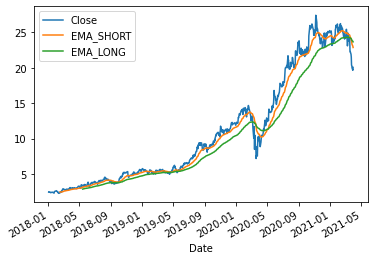

In [21]:
df[['Close','EMA_SHORT','EMA_LONG']].plot();